# NPS & UBA Dataset

You are a Data Scientist responsible for data exploration to find valuable business insights for CX department. 
You were provided with set of data, generated from interviews with random people across Poland 
aiming to measure Unaided Brand Awareness and NPS. The questions are:
- what we can learn from the data? 
- what can we do to understand customers better?

Dataset columns:
- QuestID - index
- InterviewDate - date of interview
- InterviewLengthSec - how long was interview?
- InterviewStatus - completed [value = 1] or not [value = 0]
- AgeBands - age buckets; codified
- Region - region of Poland; codified
- Columns: BA0xxxx - answers for questions 'have you heard of company BA0xxxx (company names codified)
- SU01R - codified company names, who deliver product for Customers
- NPS01R - value of NPS question (please use 'wikipiedia' NPS definitions)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('datasets/Results_RAW.csv', sep=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   QuestID             3546 non-null   int64 
 1   InterviewDate       3546 non-null   object
 2   InterviewLengthSec  3546 non-null   int64 
 3   InterviewStatus     3546 non-null   int64 
 4   AgeBands            3546 non-null   int64 
 5   Region              3546 non-null   int64 
 6   BA01R_KA_1          3546 non-null   int64 
 7   BA02R_271_PL        3546 non-null   int64 
 8   BA02R_272_PL        3546 non-null   int64 
 9   BA02R_273_PL        3546 non-null   int64 
 10  BA02R_274_PL        3546 non-null   int64 
 11  BA02R_279_PL        3546 non-null   int64 
 12  BA02R_280_PL        3546 non-null   int64 
 13  BA02R_282_PL        3546 non-null   int64 
 14  BA02R_283_PL        3546 non-null   int64 
 15  BA02R_284_PL        3546 non-null   int64 
 16  BA02R_285_PL        3546

In [2]:
data.head()

QuestID InterviewDate  InterviewLengthSec  InterviewStatus  AgeBands  \
0        1    12.04.2020                 107                1         3   
1        2    07.04.2020                 379                1         5   
2        3    12.04.2020                 384                1         3   
3        4    03.04.2020                 227                1         5   
4        5    21.04.2020                 176                1         2   

   Region  BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  BA02R_274_PL  \
0     911           0             0             1             1             1   
1     903           0             1             1             1             1   
2     901           1             0             1             0             0   
3     914           0             0             0             0             0   
4     907           0             1             1             1             1   

   BA02R_279_PL  BA02R_280_PL  BA02R_282_PL  BA02R_283_PL  BA02R_284_PL  \
0             0             1             1             1             0   
1             0             0             1             1             0   
2             0             0             0             0             0   
3             0             0             1             0             0   
4             0             1             1             1             0   

   BA02R_285_PL  SU01R  NPS01R  
0             0    552       0  
1             0    543       5  
2             0    542       2  
3             0    552       6  
4             0    541       0

# Data cleaning

In [3]:
data.isnull().sum()

QuestID               0
InterviewDate         0
InterviewLengthSec    0
InterviewStatus       0
AgeBands              0
Region                0
BA01R_KA_1            0
BA02R_271_PL          0
BA02R_272_PL          0
BA02R_273_PL          0
BA02R_274_PL          0
BA02R_279_PL          0
BA02R_280_PL          0
BA02R_282_PL          0
BA02R_283_PL          0
BA02R_284_PL          0
BA02R_285_PL          0
SU01R                 0
NPS01R                0
dtype: int64

In [4]:
data['InterviewDate'] = pd.to_datetime(data['InterviewDate'], format='%d.%m.%Y').dt.date
data['InterviewDate']


0       2020-04-12
1       2020-04-07
2       2020-04-12
3       2020-04-03
4       2020-04-21
           ...    
3541    2020-06-12
3542    2020-06-02
3543    2020-06-04
3544    2020-06-03
3545    2020-06-17
Name: InterviewDate, Length: 3546, dtype: object

# NPS Analysis

## Total NPS Score

First off let's add column responsible for categorize values of NPS questions.

In [5]:
def nps_tag(x):
    if x <= 6:
        return 'detractor'
    elif x <= 8:
        return 'passive'
    else:        
        return 'promoter'
    
data['nps_tag'] = data['NPS01R'].apply(nps_tag)
data.head(10)

QuestID InterviewDate  InterviewLengthSec  InterviewStatus  AgeBands  \
0        1    2020-04-12                 107                1         3   
1        2    2020-04-07                 379                1         5   
2        3    2020-04-12                 384                1         3   
3        4    2020-04-03                 227                1         5   
4        5    2020-04-21                 176                1         2   
5        6    2020-04-08                2101                1         5   
6        7    2020-04-15                  97                1         2   
7        8    2020-04-15                  74                1         2   
8        9    2020-04-07                 125                1         2   
9       10    2020-04-14                 313                1         3   

   Region  BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  BA02R_274_PL  \
0     911           0             0             1             1             1   
1     903           0             1             1             1             1   
2     901           1             0             1             0             0   
3     914           0             0             0             0             0   
4     907           0             1             1             1             1   
5     906           0             0             1             1             0   
6     906           0             0             0             1             0   
7     903           0             0             0             0             0   
8     907           0             0             0             1             0   
9     905           1             1             0             0             0   

   BA02R_279_PL  BA02R_280_PL  BA02R_282_PL  BA02R_283_PL  BA02R_284_PL  \
0             0             1             1             1             0   
1             0             0             1             1             0   
2             0             0             0             0             0   
3             0             0             1             0             0   
4             0             1             1             1             0   
5             0             0             1             1             0   
6             0             0             0             0             0   
7             0             0             1             0             0   
8             0             0             0             0             0   
9             0             0             0             0             0   

   BA02R_285_PL  SU01R  NPS01R    nps_tag  
0             0    552       0  detractor  
1             0    543       5  detractor  
2             0    542       2  detractor  
3             0    552       6  detractor  
4             0    541       0  detractor  
5             0    542       2  detractor  
6             0    549       0  detractor  
7             0    543       4  detractor  
8             0    543       3  detractor  
9             0    541       5  detractor

Now, let's compute general NPS value for the whole dataset.

In [33]:
grouped = data.groupby('nps_tag')
nps_total = grouped.size()
nps_total /= data['nps_tag'].size
nps_total['NPS'] = round((nps_total['promoter'] - nps_total['detractor'] ) * 100)

nps_total.to_frame('')

nps_tag             
detractor   0.701354
passive     0.205020
promoter    0.093627
NPS       -61.000000

We see that according to the whole dataset we have around 70% of detractors, 21% of passives and 9% of promoters.
Consequently, our NPS score is equal to -61, which is not a good sign. Majority of people interacting with our products are having a bad experience.

## NPS vs Deliver Company

Let's dig a bit deeper and group our data by codified company names.

In [7]:
grouped = data.groupby(['SU01R', 'nps_tag'])
company_nps = grouped.size().unstack().rename_axis(None, axis=1)


company_nps['NPS'] = round((company_nps['promoter'] - company_nps['detractor']) / company_nps.sum(axis=1) * 100)
company_nps.sort_values(by='NPS')
company_nps.reset_index(inplace=True)
company_nps

SU01R  detractor  passive  promoter   NPS
0     421        7.0      4.0       2.0 -38.0
1     541      688.0    194.0      97.0 -60.0
2     542      531.0    173.0      78.0 -58.0
3     543      479.0    129.0      52.0 -65.0
4     544      287.0     80.0      36.0 -62.0
5     549        9.0      6.0       2.0 -41.0
6     550       31.0     11.0       8.0 -46.0
7     552      327.0     99.0      40.0 -62.0
8     553       98.0     26.0      15.0 -60.0
9     554       21.0      5.0       1.0 -74.0
10    555        9.0      NaN       1.0 -80.0

In [8]:
%config InlineBackend.figure_format = 'svg'

<ipython-input-34-47bedf25fdc8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, -10, -20, -30, -40, -50, -60, -70, -80])


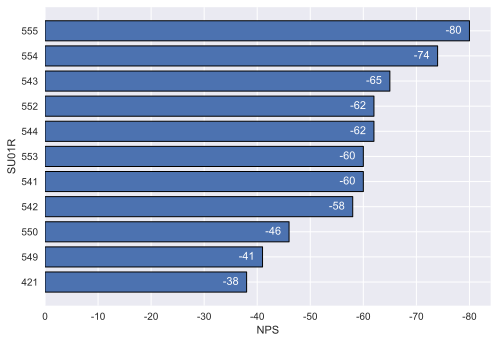

In [34]:
import matplotlib.pyplot as plt

def add_label_barh(rects, ax):
    for rect in rects:
        width = rect.get_width()
        ax.text(rect.get_x() + rect.get_width() - 3, rect.get_y() + rect.get_height()/2.,
                '-%d' % width,
                ha='center', va='center', color='white', size=11)


company_nps.sort_values(by='NPS', inplace=True, ascending=False)        
y = company_nps['SU01R'].tolist() # convert to list so as to easily add_label_barh()
y = [str(i) for i in y]
x = abs(company_nps['NPS']).tolist()

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(y, x, edgecolor="black", linewidth=1)
ax.set_xticklabels([0, -10, -20, -30, -40, -50, -60, -70, -80])
ax.set_ylabel('SU01R')
ax.set_xlabel('NPS')
add_label_barh(ax.patches, ax);

We see that the worst NPS scores have companies number 555 and 554 (-80 and -74), however few interviews have been providen there in comparsion to the other companies. Furthermore, none of the companies have achieved a positive NPS value. 'The best' NPS scores have companies no. 421 and 549, but similarly as before, not enough interviews have been providen there. 
We should conduct more interviews involved with these four companies mentioned above to check if it is coincidence or not. 

## NPS vs Mean Interview Length

As a next step in NPS Analysis, I compare mean interview length for each NPS tag group.


In [10]:
data['InterviewLengthSec'].median()

341.0

In [11]:
data[data['InterviewLengthSec'] > 3600]

QuestID InterviewDate  InterviewLengthSec  InterviewStatus  AgeBands  \
87         88    2020-04-18                6014                1         2   
263       264    2020-04-18                6872                1         3   
312       313    2020-04-09              108468                1         5   
375       376    2020-04-06                4143                1         5   
448       449    2020-04-07               20839                1         5   
569       570    2020-04-09                5107                1         2   
675       676    2020-04-03               10896                1         1   
779       780    2020-04-26                4589                1         4   
803       804    2020-04-21                4392                1         4   
1016     1017    2020-04-07              151772                1         1   
1088     1089    2020-04-09               16459                1         5   
1141     1142    2020-04-15                4943                1         2   
1220     1221    2020-05-10               34731                1         2   
1225     1226    2020-05-10                4629                1         2   
1271     1272    2020-05-04                7012                1         5   
1877     1878    2020-05-08               62710                1         5   
2034     2035    2020-05-22               92686                1         3   
2201     2202    2020-05-20                9816                1         4   
2258     2259    2020-05-10              237215                1         2   
2278     2279    2020-05-05                4382                1         5   
2289     2290    2020-05-08               10167                1         5   
2522     2523    2020-06-14                7807                1         2   
2584     2585    2020-06-20                5008                1         2   
2611     2612    2020-06-06                4510                1         2   
2710     2711    2020-06-03               38262                1         5   
2792     2793    2020-06-08                5209                1         5   
2815     2816    2020-06-04                6344                1         2   
3015     3016    2020-06-27                4018                1         2   
3108     3109    2020-06-08                3767                1         3   
3138     3139    2020-06-14               11135                1         3   
3167     3168    2020-06-03               24125                1         1   
3454     3455    2020-06-03                5153                1         1   
3526     3527    2020-06-15                4430                1         4   

      Region  BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  \
87       907           1             1             1             1   
263      912           0             1             1             1   
312      907           0             0             0             1   
375      909           0             0             1             1   
448      906           0             0             1             1   
569      904           0             0             1             1   
675      904           0             0             1             1   
779      908           0             1             1             1   
803      902           0             1             1             1   
1016     907           0             1             1             1   
1088     905           0             0             1             1   
1141     912           0             0             1             1   
1220     903           0             0             1             1   
1225     907           0             1             1             1   
1271     907           0             0             0             1   
1877     901           0             0             1             1   
2034     912           0             1             1             1   
2201     912           0             1             1             0   
2258     905           

The median value of InterviewLengthSec is 341.0, however there are some records that are too far away from that value. Let's suppose that a real interview lasts no longer than an hour and these values are just system bugs or situations where people left their mobile on a call.

In [12]:
length_nps = data[data['InterviewLengthSec'] < 3600]
grouped = length_nps.groupby('nps_tag')

grouped['InterviewLengthSec'].mean()

nps_tag
detractor    420.258418
passive      423.646732
promoter     399.547112
Name: InterviewLengthSec, dtype: float64

As a consequence, we see that interviews with promoters take less time than interviews with detractors. It's quite understandable, people want to finish an interview as soon as possible and if it succeeds they give better reviews.

## NPS vs Region

Now, let's check NPS score for each separated region of Poland.

In [13]:
grouped = data.groupby(['Region', 'nps_tag'])
region_nps = grouped.size().unstack().rename_axis(None, axis=1)

region_nps['NPS'] = round((region_nps['promoter'] - region_nps['detractor']) / region_nps.sum(axis=1) * 100)
region_nps.sort_values(by='NPS')

detractor  passive  promoter   NPS
Region                                    
911           128       19        20 -65.0
906           152       46        16 -64.0
909            93       28        10 -63.0
907           866      239       108 -62.0
914            65       22         7 -62.0
915           172       50        21 -62.0
916            82       27         9 -62.0
910            61       11        11 -60.0
912           247       76        33 -60.0
903           125       43        16 -59.0
901           140       47        20 -58.0
904           104       41        13 -58.0
902           103       38        14 -57.0
913            59       14        11 -57.0
905            45       11        10 -53.0
908            45       15        13 -44.0

The highest NPS score achieved region no. 908, that could mean that services providen then are of a bit better quality in comparsion to the other regions.

## NPS vs AgeBands

In [14]:
grouped = data.groupby(['AgeBands', 'nps_tag'])
age_nps = grouped.size().unstack().rename_axis(None, axis=1)

age_nps['NPS'] = round((age_nps['promoter'] - age_nps['detractor']) / age_nps.sum(axis=1) * 100)
age_nps.sort_values(by='NPS')

detractor  passive  promoter   NPS
AgeBands                                    
5               892      228       100 -65.0
3               504      146        70 -60.0
2               535      180        73 -59.0
4               353      104        51 -59.0
1               203       69        38 -53.0

<ipython-input-15-274f0cc1fda5>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, -10, -20, -30, -40, -50, -60])


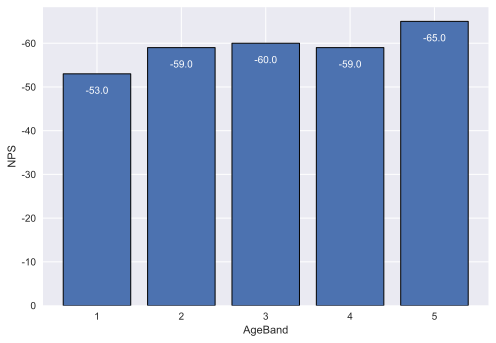

In [15]:
import matplotlib.pyplot as plt

def add_label_bar(x, y):
    for i in range(len(y)):
        plt.annotate('-' + str(y[i]), xy=(x[i], y[i] - 5), ha='center', va='bottom', color='w')

age_nps.sort_values(by='NPS', inplace=True, ascending=False)        
x = age_nps.reset_index()['AgeBands'].tolist() # convert to list so as to easily add_label_bar()
y = abs(age_nps['NPS']).tolist()

fig, ax = plt.subplots()
ax.set_yticklabels([0, -10, -20, -30, -40, -50, -60])
ax.bar(x, y, edgecolor="black", linewidth=1)
ax.set_ylabel('NPS')
ax.set_xlabel('AgeBand')
add_label_bar(x, y)

We can see that the higher the AgeBand, the lower the NPS score.

## NPS vs Day Of Week

Let's analyse NPS score depending on day of week.

In [16]:
week_days = {0: 'Monday',
             1: 'Tuesday',
             2: 'Wednesday',
             3: 'Thursday',
             4: 'Friday',
             5: 'Saturday',
             6: 'Sunday'}

data['weekday'] = pd.to_datetime(data.InterviewDate).dt.weekday.map(week_days)
data

QuestID InterviewDate  InterviewLengthSec  InterviewStatus  AgeBands  \
0           1    2020-04-12                 107                1         3   
1           2    2020-04-07                 379                1         5   
2           3    2020-04-12                 384                1         3   
3           4    2020-04-03                 227                1         5   
4           5    2020-04-21                 176                1         2   
...       ...           ...                 ...              ...       ...   
3541     3542    2020-06-12                 240                1         4   
3542     3543    2020-06-02                 359                1         1   
3543     3544    2020-06-04                 412                1         3   
3544     3545    2020-06-03                 327                1         1   
3545     3546    2020-06-17                 194                1         3   

      Region  BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  ...  \
0        911           0             0             1             1  ...   
1        903           0             1             1             1  ...   
2        901           1             0             1             0  ...   
3        914           0             0             0             0  ...   
4        907           0             1             1             1  ...   
...      ...         ...           ...           ...           ...  ...   
3541     916           0             0             1             0  ...   
3542     906           0             0             1             1  ...   
3543     907           0             1             1             1  ...   
3544     907           0             0             1             1  ...   
3545     903           0             1             1             1  ...   

      BA02R_279_PL  BA02R_280_PL  BA02R_282_PL  BA02R_283_PL  BA02R_284_PL  \
0                0             1             1             1             0   
1                0             0             1             1             0   
2                0             0             0             0             0   
3                0             0             1             0             0   
4                0             1             1             1             0   
...            ...           ...           ...           ...           ...   
3541             1             1             1             1             0   
3542             1             1             0             0             0   
3543             0             0             1             1             0   
3544             1             1             1             1             0   
3545             1             1             1             1             1   

      BA02R_285_PL  SU01R  NPS01R    nps_tag    weekday  
0                0    552       0  detractor     Sunday  
1                0    543       5  detractor    Tuesday  
2                0    542       2  detractor     Sunday  
3                0    552       6  detractor     Friday  
4                0    541       0  detractor    Tuesday  
...            ...    ...     ...        ...        ...  
3541             0    552       5  detractor     Friday  
3542             0    542       5  detractor    Tuesday  
3543             0    552       4  detractor   Thursday  
3544             1    543       7    passive  Wednesday  
3545             1    543       7    passive  Wednesday  

[3546 rows x 21 columns]

In [17]:
grouped = data.groupby(['weekday', 'nps_tag'])
day_nps = grouped.size().unstack().rename_axis(None, axis=1)

day_nps['NPS'] = round((day_nps['promoter'] - day_nps['detractor']) / day_nps.sum(axis=1) * 100)
day_nps.sort_values(by='NPS')

detractor  passive  promoter   NPS
weekday                                      
Friday           310       79        30 -67.0
Saturday         283       76        25 -67.0
Thursday         377      106        44 -63.0
Tuesday          454      130        55 -62.0
Sunday           361      112        53 -59.0
Monday           336      104        57 -56.0
Wednesday        366      120        68 -54.0

As we can expect the lowest NPS score is during the weekend (Friday & Saturday) when people want to take rest instead of taking part in interviews. If we want to obtain more reliable NPS data, we should interview people during working days.

# Unaided Brand Awareness Analysis

## General UBA

First, let's compute general Unaided Brand Awareness data.

In [18]:
brands = ['BA01R_KA_1', 'BA02R_271_PL', 'BA02R_272_PL', 'BA02R_273_PL', 'BA02R_274_PL', 
         'BA02R_279_PL', 'BA02R_280_PL', 'BA02R_282_PL', 'BA02R_283_PL', 'BA02R_284_PL', 'BA02R_285_PL']

uba_total = data[brands].mean()
uba_total.sort_values(inplace=True)
uba_total = uba_total.to_frame('perc')
uba_total

perc
BA01R_KA_1    0.027073
BA02R_284_PL  0.124929
BA02R_285_PL  0.131134
BA02R_279_PL  0.312747
BA02R_271_PL  0.430626
BA02R_280_PL  0.433446
BA02R_283_PL  0.780880
BA02R_274_PL  0.801466
BA02R_273_PL  0.819797
BA02R_282_PL  0.837563
BA02R_272_PL  0.864636

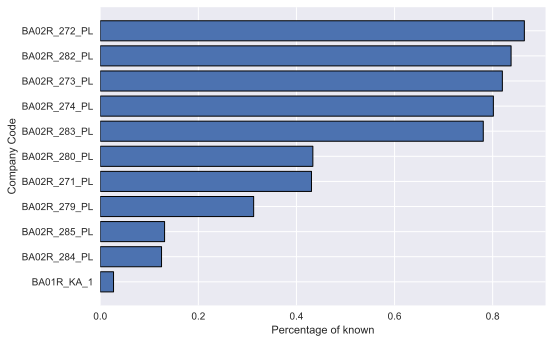

In [19]:
y = uba_total.index.tolist()
x = uba_total['perc'].tolist()

fig, ax = plt.subplots()
ax.barh(y, x, edgecolor="black", linewidth=1)
ax.set_ylabel('Company Code')
ax.set_xlabel('Percentage of known');

Only 3% of interviewee mentioned about company no. BA01R_KA_1, it hasn't PL tag so perhaps it is a foreign company and that is why lack of people heard about it. Similary, only 13% of people indicated companies BA02R_284/5_PL, they have similar tag so they may be related. Most popular companies, mentioned by around 80% or more interviewee are companies no. BA02R_283_PL, BA02R_274_PL, BA02R_273_PL, BA02R_282_PL and BA02R_272_PL.

## UBA vs Region

In [20]:
grouped = data.groupby('Region')
uba_regions = grouped[brands].mean()
uba_regions

BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  BA02R_274_PL  \
Region                                                                       
901       0.043478      0.144928      0.937198      0.681159      0.661836   
902       0.019355      0.238710      0.832258      0.709677      0.890323   
903       0.027174      0.298913      0.836957      0.951087      0.777174   
904       0.063291      0.253165      0.848101      0.911392      0.715190   
905       0.060606      0.196970      0.757576      0.666667      0.924242   
906       0.028037      0.214953      0.957944      0.771028      0.785047   
907       0.023908      0.835944      0.841715      0.864798      0.798021   
908       0.013699      0.205479      0.958904      0.726027      0.767123   
909       0.045802      0.183206      0.793893      0.931298      0.755725   
910       0.096386      0.325301      0.795181      0.951807      0.771084   
911       0.023952      0.269461      0.814371      0.772455      0.862275   
912       0.005618      0.182584      0.980337      0.750000      0.750000   
913       0.047619      0.238095      0.857143      0.952381      0.857143   
914       0.010638      0.202128      0.861702      0.893617      0.840426   
915       0.016461      0.222222      0.831276      0.732510      0.946502   
916       0.000000      0.194915      0.838983      0.737288      0.872881   

        BA02R_279_PL  BA02R_280_PL  BA02R_282_PL  BA02R_283_PL  BA02R_284_PL  \
Region                                                                         
901         0.275362      0.396135      0.768116      0.661836      0.164251   
902         0.412903      0.483871      0.922581      0.812903      0.090323   
903         0.413043      0.429348      0.826087      0.777174      0.103261   
904         0.373418      0.468354      0.791139      0.803797      0.088608   
905         0.272727      0.393939      0.772727      0.757576      0.045455   
906         0.355140      0.485981      0.836449      0.808411      0.116822   
907         0.244847      0.412201      0.818631      0.793899      0.128607   
908         0.260274      0.452055      0.808219      0.821918      0.068493   
909         0.343511      0.396947      0.839695      0.832061      0.129771   
910         0.409639      0.457831      0.867470      0.807229      0.096386   
911         0.353293      0.479042      0.976048      0.754491      0.155689   
912         0.283708      0.373596      0.817416      0.780899      0.179775   
913         0.392857      0.523810      0.821429      0.773810      0.119048   
914         0.404255      0.553191      0.946809      0.744681      0.106383   
915         0.370370      0.432099      0.851852      0.761317      0.102881   
916         0.364407      0.508475      0.915254      0.762712      0.110169   

        BA02R_285_PL  
Region                
901         0.053140  
902         0.103226  
903         0.114130  
904         0.094937  
905         0.045455  
906         0.070093  
907         0.224237  
908         0.013699  
909         0.099237  
910         0.120482  
911         0.125749  
912         0.050562  
913         0.154762  
914         0.074468  
915         0.082305  
916         0.076271

We do not need the whole data, let's say just max and min value for each region.

In [21]:
def get_col_name(x):
    for col in brands:
        if x in uba_regions[col].tolist():
            return col
            
uba_regions_max = uba_regions.max(axis=1).to_frame('perc').reset_index()
uba_regions_max['company'] = uba_regions_max['perc'].apply(get_col_name)
uba_regions_max

Region      perc       company
0      901  0.937198  BA02R_272_PL
1      902  0.922581  BA02R_282_PL
2      903  0.951087  BA02R_273_PL
3      904  0.911392  BA02R_273_PL
4      905  0.924242  BA02R_274_PL
5      906  0.957944  BA02R_272_PL
6      907  0.864798  BA02R_273_PL
7      908  0.958904  BA02R_272_PL
8      909  0.931298  BA02R_273_PL
9      910  0.951807  BA02R_273_PL
10     911  0.976048  BA02R_282_PL
11     912  0.980337  BA02R_272_PL
12     913  0.952381  BA02R_273_PL
13     914  0.946809  BA02R_282_PL
14     915  0.946502  BA02R_274_PL
15     916  0.915254  BA02R_282_PL

In [22]:
uba_regions_min = uba_regions.min(axis=1).to_frame('perc').reset_index()
uba_regions_min['company'] = uba_regions_min['perc'].apply(get_col_name)
uba_regions_min

Region      perc       company
0      901  0.043478    BA01R_KA_1
1      902  0.019355    BA01R_KA_1
2      903  0.027174    BA01R_KA_1
3      904  0.063291    BA01R_KA_1
4      905  0.045455  BA02R_284_PL
5      906  0.028037    BA01R_KA_1
6      907  0.023908    BA01R_KA_1
7      908  0.013699    BA01R_KA_1
8      909  0.045802    BA01R_KA_1
9      910  0.096386    BA01R_KA_1
10     911  0.023952    BA01R_KA_1
11     912  0.005618    BA01R_KA_1
12     913  0.047619    BA01R_KA_1
13     914  0.010638    BA01R_KA_1
14     915  0.016461    BA01R_KA_1
15     916  0.000000    BA01R_KA_1

When it comes to minimum per Region there are no suprises, in each Region despite no. 4 company BA01R_KA_1 was the least popular. However, when it comes to maximum per Region there are some mixed company names, although each of them belongs to general top five comapnies (BA02R_283_PL, BA02R_274_PL, BA02R_273_PL, BA02R_282_PL and BA02R_272_PL). Interesting fact is that in Regions no. 911 and 912 around 98% of interviewee pointed out companies BA02R_282_PL and BA02R_272_PL.

What we can also do is a revert operation - check which region is the most convienient for each company.

In [23]:
def get_region_id(x):
    for col in brands:
        if x in uba_regions[col].tolist():
            return uba_regions[uba_regions[col] == x].index[0]


uba_company_max = uba_regions.max(axis=0).to_frame('perc').reset_index()
uba_company_max['Region'] = uba_company_max['perc'].apply(get_region_id)
uba_company_max

index      perc  Region
0     BA01R_KA_1  0.096386     910
1   BA02R_271_PL  0.835944     907
2   BA02R_272_PL  0.980337     912
3   BA02R_273_PL  0.952381     913
4   BA02R_274_PL  0.946502     915
5   BA02R_279_PL  0.413043     903
6   BA02R_280_PL  0.553191     914
7   BA02R_282_PL  0.976048     911
8   BA02R_283_PL  0.832061     909
9   BA02R_284_PL  0.179775     912
10  BA02R_285_PL  0.224237     907

Let's add column that sums total numbers of companies that interviewee heard about.

In [24]:
data['total_heard'] =  data[brands].sum(axis=1)
data.head()

QuestID InterviewDate  InterviewLengthSec  InterviewStatus  AgeBands  \
0        1    2020-04-12                 107                1         3   
1        2    2020-04-07                 379                1         5   
2        3    2020-04-12                 384                1         3   
3        4    2020-04-03                 227                1         5   
4        5    2020-04-21                 176                1         2   

   Region  BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  ...  \
0     911           0             0             1             1  ...   
1     903           0             1             1             1  ...   
2     901           1             0             1             0  ...   
3     914           0             0             0             0  ...   
4     907           0             1             1             1  ...   

   BA02R_280_PL  BA02R_282_PL  BA02R_283_PL  BA02R_284_PL  BA02R_285_PL  \
0             1             1             1             0             0   
1             0             1             1             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             1             1             1             0             0   

   SU01R  NPS01R    nps_tag  weekday total_heard  
0    552       0  detractor   Sunday           6  
1    543       5  detractor  Tuesday           6  
2    542       2  detractor   Sunday           2  
3    552       6  detractor   Friday           1  
4    541       0  detractor  Tuesday           7  

[5 rows x 22 columns]

In [25]:
grouped = data.groupby('Region')
grouped['total_heard'].mean().to_frame().sort_values(by='total_heard', ascending=False)

total_heard
Region             
907        5.986810
913        5.738095
910        5.698795
914        5.638298
911        5.586826
903        5.554348
902        5.516129
906        5.429907
904        5.411392
916        5.381356
909        5.351145
915        5.349794
912        5.154494
908        5.095890
905        4.893939
901        4.787440

Thanks to that manipulation we can see that interviewee from Region no. 907 heard average 6 of 11 companies, meanwhile interviewee from Region no. 901 heard average 4.8 of 11.

## UBA vs AgeBands

As a last step in UBA Analysis, let's perform similar analysis for AgeBands.

In [26]:
grouped = data.groupby('AgeBands')
uba_age = grouped[brands].mean()
uba_age

BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  BA02R_274_PL  \
AgeBands                                                                       
1           0.054839      0.319355      0.803226      0.900000      0.700000   
2           0.019036      0.602792      0.878173      0.884518      0.833756   
3           0.020833      0.588889      0.884722      0.845833      0.845833   
4           0.017717      0.531496      0.907480      0.846457      0.850394   
5           0.032787      0.212295      0.841803      0.731148      0.759836   

          BA02R_279_PL  BA02R_280_PL  BA02R_282_PL  BA02R_283_PL  \
AgeBands                                                           
1             0.445161      0.558065      0.877419      0.774194   
2             0.364213      0.503807      0.846447      0.803299   
3             0.352778      0.462500      0.852778      0.813889   
4             0.287402      0.391732      0.856299      0.807087   
5             0.232787      0.356557      0.804918      0.737705   

          BA02R_284_PL  BA02R_285_PL  
AgeBands                              
1             0.125806      0.135484  
2             0.164975      0.213198  
3             0.170833      0.188889  
4             0.137795      0.153543  
5             0.066393      0.033607

We've got slightly less data as before, so I won't introduce max and min value for each AgeBand. We can read it directly from dataframe, for example best-known company for AgeBand no. 1 is BA02R_273_PL with 90% and the worst is BA01R_KA_1 with 5%. However, let's compute most convienient AgeBand target for each company.

In [27]:
def get_ageband_id(x):
    for col in brands:
        if x in uba_age[col].tolist():
            return uba_age[uba_age[col] == x].index[0]


uba_age_target = uba_age.max(axis=0).to_frame('perc').reset_index()
uba_age_target['AgeBand'] = uba_age_target['perc'].apply(get_ageband_id)
uba_age_target


index      perc  AgeBand
0     BA01R_KA_1  0.054839        1
1   BA02R_271_PL  0.602792        2
2   BA02R_272_PL  0.907480        4
3   BA02R_273_PL  0.900000        1
4   BA02R_274_PL  0.850394        4
5   BA02R_279_PL  0.445161        1
6   BA02R_280_PL  0.558065        1
7   BA02R_282_PL  0.877419        1
8   BA02R_283_PL  0.813889        3
9   BA02R_284_PL  0.170833        3
10  BA02R_285_PL  0.213198        2

As a final step, average number of indicated companies for each AgeBand.

In [28]:
grouped = data.groupby('AgeBands')
grouped['total_heard'].mean().to_frame().sort_values(by='total_heard', ascending=False)

total_heard
AgeBands             
2            6.114213
3            6.027778
4            5.787402
1            5.693548
5            4.809836

As we can see the least company names provided AgeBand no. 5 (average 4.8 of 11) and the most AgeBand no. 2 (6.1 of 11).

## ML brands test

In [29]:
def nps_tag_numeric(x):
    if x <= 6:
        return 0
    elif x <= 8:
        return 1
    else:        
        return 2
    
data['nps_tag_numeric'] = data['NPS01R'].apply(nps_tag_numeric)
data.tail()

QuestID InterviewDate  InterviewLengthSec  InterviewStatus  AgeBands  \
3541     3542    2020-06-12                 240                1         4   
3542     3543    2020-06-02                 359                1         1   
3543     3544    2020-06-04                 412                1         3   
3544     3545    2020-06-03                 327                1         1   
3545     3546    2020-06-17                 194                1         3   

      Region  BA01R_KA_1  BA02R_271_PL  BA02R_272_PL  BA02R_273_PL  ...  \
3541     916           0             0             1             0  ...   
3542     906           0             0             1             1  ...   
3543     907           0             1             1             1  ...   
3544     907           0             0             1             1  ...   
3545     903           0             1             1             1  ...   

      BA02R_282_PL  BA02R_283_PL  BA02R_284_PL  BA02R_285_PL  SU01R  NPS01R  \
3541             1             1             0             0    552       5   
3542             0             0             0             0    542       5   
3543             1             1             0             0    552       4   
3544             1             1             0             1    543       7   
3545             1             1             1             1    543       7   

        nps_tag    weekday  total_heard nps_tag_numeric  
3541  detractor     Friday            6               0  
3542  detractor    Tuesday            5               0  
3543  detractor   Thursday            6               0  
3544    passive  Wednesday            8               1  
3545    passive  Wednesday           10               1  

[5 rows x 23 columns]

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = data.loc[:, brands].values
y = data.nps_tag_numeric.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

gbrt = GradientBoostingClassifier(max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.701
Accuracy on test set: 0.701


In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.70
